In [191]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
import texthero as hero
import warnings
warnings.filterwarnings('ignore')

# Music Genre classification 

**Project overview :** 
This project aims to classify Song into 11 different genre , The Dataset acquired  from [MachineHack](https://machinehack.com/)<br><br>
**Problem:** 
* This dataset acquired  from one of the compitition which classfied as intermidiate.
* Imbalanced DataSet with 11 different classes to be classified . 
* lack of knowledge in machine learning field.



In [126]:
df = pd.read_csv('train.csv')
df_2= df.copy()

## 1-Analsis part of the acquired data.

In [127]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

from the above cell we can find that most of the data are numbers except of the artist name and tracks 

In [129]:
# see the statitics suumary of the data 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.12900,0.25800,1.000


from the above statistics we can conclude that the Key are categorical variable represnted from 1-11 , the mode values are 0 & 1 
- popularity might have outlires as the 75% is 56 while the max are far from this number which 100

<AxesSubplot:>

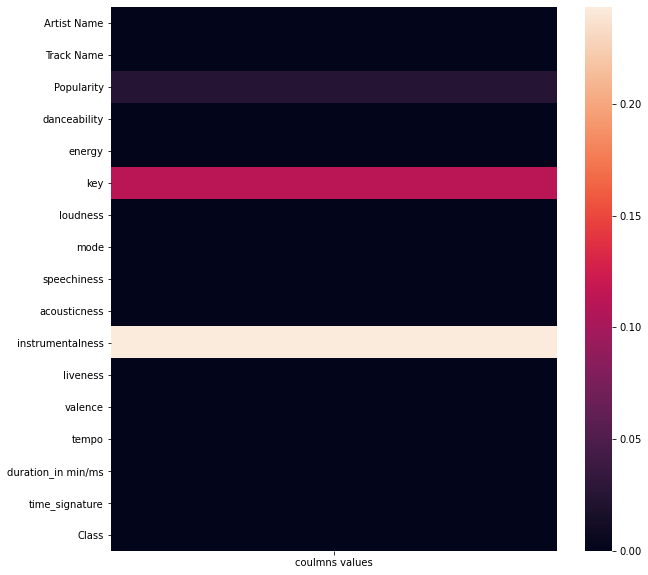

In [130]:
# display the null values as heatmap for the existd features : 
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(pd.DataFrame(df.isnull().sum()/len(df),columns=['coulmns values']),ax=ax)

<AxesSubplot:>

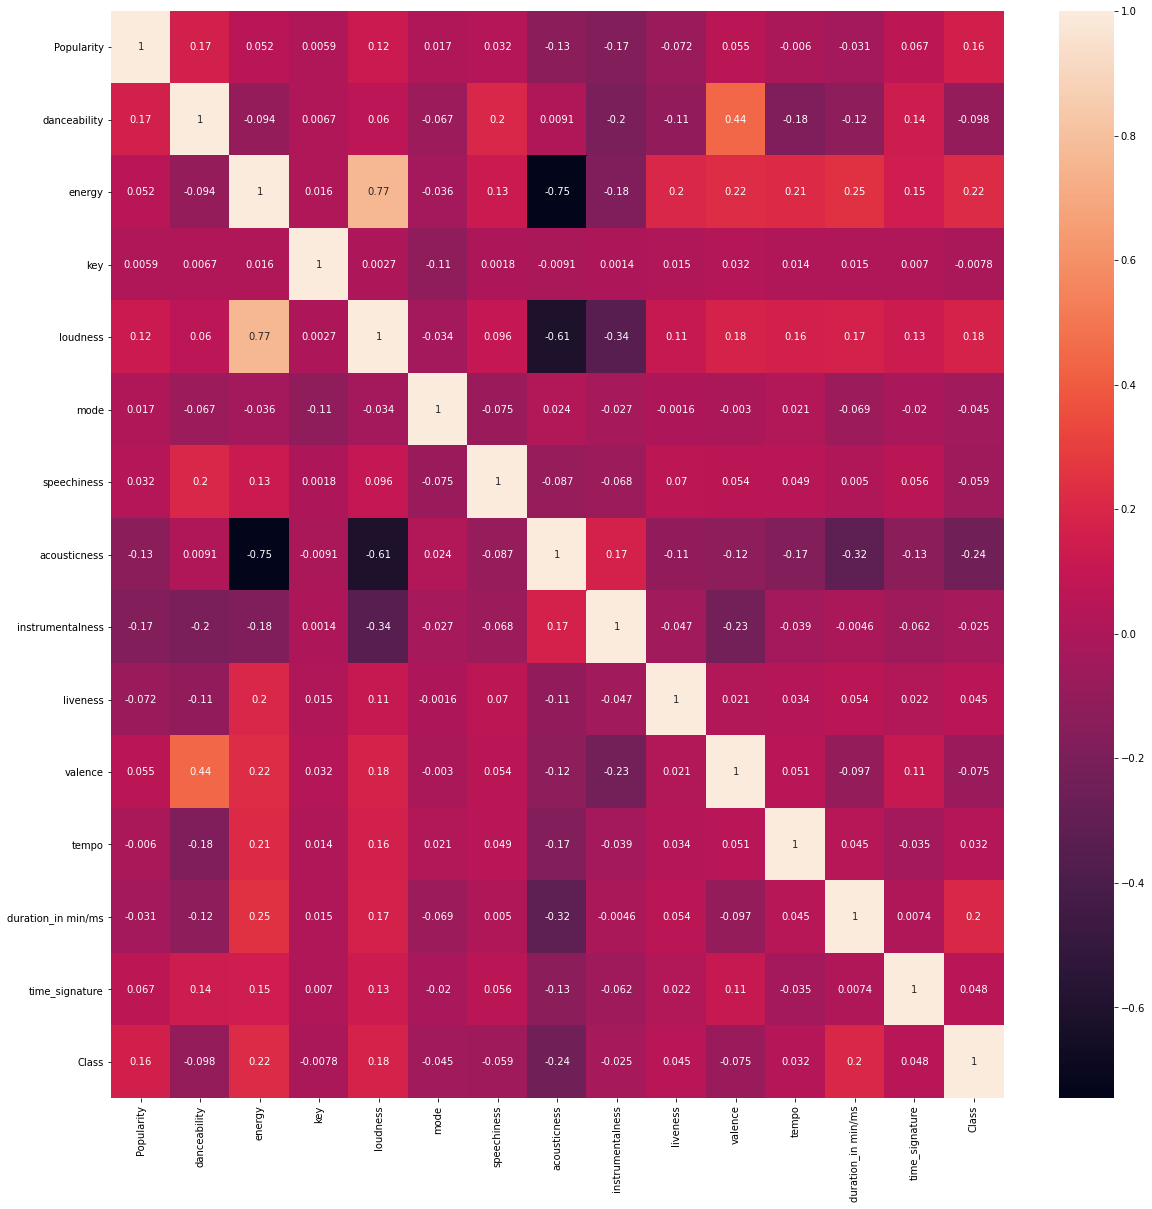

In [131]:
# display correlation as heat map 
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True ,ax=ax)

**From above heatmap we can see that there are high colleration between energy and acousticness , in addition to the energy and loudness**

In [132]:
#display the disrtpution of classes
df.Class.value_counts(normalize=True)

10    0.275006
6     0.143754
9     0.140253
8     0.103023
5     0.080407
1     0.076295
2     0.070682
0     0.034730
7     0.032007
3     0.022338
4     0.021505
Name: Class, dtype: float64

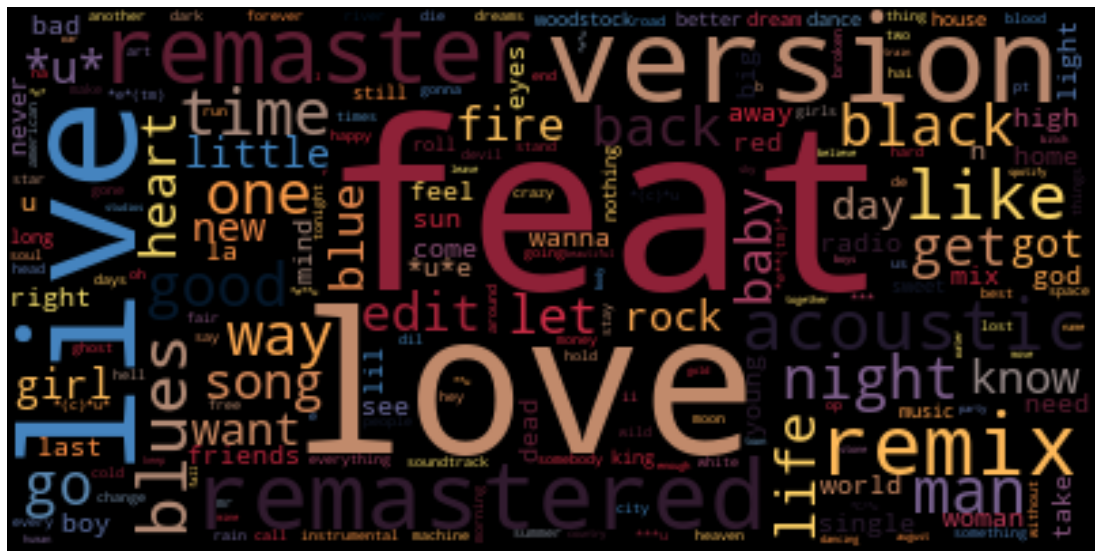

In [134]:
hero.wordcloud(hero.clean(df['Track Name']),background_color='black')

In [179]:
classes = pd.read_csv('submission.csv')
names = list(classes.columns)
names_2 = []
for name in names:
    names_2.append((str.split(name,sep='_')[0]))

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df.Class)

ax.set_xticklabels(names_2, rotation=40, ha="right")
plt.xlabel('Song genre')
plt.ylabel('Counts')
plt.title('SONG genre VS counts')
plt.tight_layout()
plt.show()

## 2- Modeling 

### fill Null values with zeros using CATBoost & Logistic regresion

In [136]:
df.fillna(value=0,inplace=True)

In [137]:
df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [138]:
# i find this method from web which is intesting to be used here esbicially for categorical variable such as artist name 
df_x = df.drop('Class',axis=1)
df_y = df['Class']
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)

#### CatBoost

In [139]:
cat_col = ['Artist Name','Track Name']

In [140]:
clf = CatBoostClassifier(loss_function='MultiClass',verbose=False)
clf.fit(x_train,y_train , cat_features = cat_col)

In [141]:
expected_y  = y_test
predicted_y = clf.predict(x_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
print(clf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       192
           1       0.59      0.29      0.39       421
           2       0.73      0.71      0.72       381
           3       0.90      0.89      0.89       126
           4       0.87      0.86      0.86       119
           5       0.82      0.84      0.83       410
           6       0.55      0.54      0.54       780
           7       0.93      0.93      0.93       160
           8       0.81      0.73      0.77       603
           9       0.74      0.65      0.69       731
          10       0.63      0.79      0.70      1476

    accuracy                           0.70      5399
   macro avg       0.76      0.74      0.74      5399
weighted avg       0.70      0.70      0.69      5399

[[ 168    0    0    4    6    0    1    6    0    3    4]
 [   0  123   13    0    0    8  111    2    9   22  133]
 [   1    2  270    0    0    2   27    0    3   13   63]
 [   9    0  

#### Logistic Regression 

In [142]:
df_x = df.drop(['Track Name','Class'],axis=1)
number = preprocessing.LabelEncoder()
df_x["Artist Name"] = number.fit_transform(df["Artist Name"])
df_y = df['Class']
## Scaling data before using it 
scaler = StandardScaler()
scaler.fit(df_x)
df_x = scaler.transform(df_x)
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)


In [143]:
LR = OneVsOneClassifier(LogisticRegression())


In [144]:
LR.fit(x_train,y_train)


OneVsOneClassifier(estimator=LogisticRegression())

In [145]:
expected_y  = y_test
predicted_y = LR.predict(x_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
print(LR.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       192
           1       0.00      0.00      0.00       421
           2       0.44      0.33      0.38       381
           3       0.71      0.66      0.68       126
           4       0.51      0.52      0.51       119
           5       0.68      0.68      0.68       410
           6       0.48      0.27      0.34       780
           7       0.88      0.88      0.88       160
           8       0.61      0.46      0.52       603
           9       0.45      0.47      0.46       731
          10       0.43      0.71      0.54      1476

    accuracy                           0.50      5399
   macro avg       0.53      0.52      0.52      5399
weighted avg       0.47      0.50      0.47      5399

[[ 142    0    0    7   11    0    0   10    0   19    3]
 [   0    0   15    0    0   21   64    1   24   47  249]
 [   1    0  125    0    0    2   23    0    6   53  171]
 [  19    0  

C:\Users\dahmo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
expected_y  = y_test
predicted_y = LR.predict(x_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
print(LR.score(x_test,y_test))

C:\Users\dahmo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      0.74      0.68       192
           1       0.00      0.00      0.00       421
           2       0.44      0.33      0.38       381
           3       0.71      0.66      0.68       126
           4       0.51      0.52      0.51       119
           5       0.68      0.68      0.68       410
           6       0.48      0.27      0.34       780
           7       0.88      0.88      0.88       160
           8       0.61      0.46      0.52       603
           9       0.45      0.47      0.46       731
          10       0.43      0.71      0.54      1476

    accuracy                           0.50      5399
   macro avg       0.53      0.52      0.52      5399
weighted avg       0.47      0.50      0.47      5399

[[ 142    0    0    7   11    0    0   10    0   19    3]
 [   0    0   15    0    0   21   64    1   24   47  249]
 [   1    0  125    0    0    2   23    0    6   53  171]
 [  19    0  

# Fill null values with knn imputer using Cat algorthim path & Logistic Regression

In [147]:
# to get null col 
mask =df_2.isnull().sum() > 0
mask[mask == True].index

Index(['Popularity', 'key', 'instrumentalness'], dtype='object')

In [148]:
imputer = KNNImputer(n_neighbors=10)
null_col = ['Popularity', 'key', 'instrumentalness']
for null in null_col: 
    df_2[null]= imputer.fit_transform(df_2[[null]])

In [149]:
df_2.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [150]:
mask =df_2.isnull().sum() > 0
mask[mask == True].index

Index([], dtype='object')

#### CatBoost  path using KNN imputer for null

In [151]:

df_x = df_2.drop('Class',axis=1)
df_y = df_2['Class']
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)
clf = CatBoostClassifier(loss_function='MultiClass',verbose=False)
clf.fit(x_train,y_train , cat_features = cat_col)
expected_y  = y_test
predicted_y = clf.predict(x_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.81      0.89      0.84       192
           1       0.56      0.25      0.35       421
           2       0.71      0.71      0.71       381
           3       0.89      0.87      0.88       126
           4       0.85      0.82      0.83       119
           5       0.80      0.84      0.82       410
           6       0.55      0.52      0.53       780
           7       0.94      0.93      0.93       160
           8       0.80      0.74      0.77       603
           9       0.73      0.64      0.68       731
          10       0.63      0.80      0.70      1476

    accuracy                           0.69      5399
   macro avg       0.75      0.73      0.73      5399
weighted avg       0.69      0.69      0.68      5399

[[ 170    0    0    4    6    0    0    5    0    2    5]
 [   0  107   13    0    0    8  108    2   14   30  139]
 [   0    4  270    0    0    4   29    0    3    9   62]
 [  11    0  

In [152]:
print(clf.score(x_test,y_test))

0.6921652157807001


#### Logistic Regression using KNN imputer for null

In [153]:
df_x = df_2.drop(['Track Name','Class'],axis=1)
number = preprocessing.LabelEncoder()
df_x["Artist Name"] = number.fit_transform(df_2["Artist Name"])
df_y = df_2['Class']
## Scaling data before using it 
scaler = StandardScaler()
scaler.fit(df_x)
df_x = scaler.transform(df_x)
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)
LR = OneVsOneClassifier(LogisticRegression())
LR.fit(x_train,y_train)
expected_y  = y_test
predicted_y = LR.predict(x_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
print(LR.score(x_test,y_test))


              precision    recall  f1-score   support

           0       0.63      0.72      0.67       192
           1       0.00      0.00      0.00       421
           2       0.44      0.36      0.40       381
           3       0.75      0.68      0.71       126
           4       0.47      0.52      0.49       119
           5       0.68      0.67      0.67       410
           6       0.47      0.24      0.32       780
           7       0.87      0.87      0.87       160
           8       0.61      0.48      0.54       603
           9       0.45      0.46      0.45       731
          10       0.43      0.70      0.53      1476

    accuracy                           0.50      5399
   macro avg       0.53      0.52      0.51      5399
weighted avg       0.47      0.50      0.47      5399

[[ 139    0    0    6   14    0    0   10    0   19    4]
 [   0    0   13    0    0   19   59    1   24   49  256]
 [   0    0  137    0    0    1   22    0    6   47  168]
 [  23    0  

C:\Users\dahmo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Summary:** <br>
at the end it seems filling the Null values with zeros perform better than imputing the null with KNN . <br>
CatBoost enhanced the metrics of the model and perform much better than Logistic Regression .